## BUILD THE GRAPH - METHOD 1

In [2]:
## Read DAILOG DATASET
import numpy as np
import pandas as pd
import networkx as nx
from networkx import path_graph, random_layout
import matplotlib.pyplot as plt
random_state = np.random.RandomState(42)

In [3]:
data_raw = pd.read_pickle("data/Daily_Dailog_raw.pkl")

In [4]:
data_raw["train"]["conversation"][0]

['Say , Jim , how about going for a few beers after dinner ?',
 'You know that is tempting but is really not good for our fitness .',
 'What do you mean ? It will help us to relax .',
 "Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?",
 "I guess you are right.But what shall we do ? I don't feel like sitting at home .",
 'I suggest a walk over to the gym where we can play singsong and meet some of our friends .',
 "That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them .",
 'Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too .',
 "Good.Let ' s go now .",
 'All right .']

In [5]:
def plot_graph_with_color(Graph, pos, labels, ax, colors = None, COLOR_SCHEME = 'Set1'):
    """
    """
    if colors is None:
        colors = [labels[node] for node in list(Graph.nodes())]
    nx.draw_networkx(Graph, pos=pos, labels=labels, with_labels=True, node_color=colors, cmap=COLOR_SCHEME, ax=ax)

def plot_graphs(Graph, mapping_conv, mapping_label):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
    # pos_nodes = nx.spring_layout(G)
    pos_nodes = random_layout(Graph, seed=10)
    plot_graph_with_color(Graph, pos_nodes, mapping_label, ax)
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + -0.03)
    nx.draw_networkx_labels(Graph, pos_attrs, labels=mapping_conv,font_size = 6, ax=ax)
    # nx.draw_networkx_labels(Graph, pos_attrs, labels=mapping_conv,font_size = 8, ax=ax)
    
def create_perms(node_id, window_past=3, window_future=3):
    """
    Method to construct the edges of a graph (a utterance) considering the past and future window.
    return: list of tuples. tuple -> (vertice(int), neighbor(int))
    """
    all_perms = set()
    length = len(node_id)
    array = np.arange(length)
    for j in range(length):
        perms = set()
        if window_past == -1 and window_future == -1:
            eff_array = array
        elif window_past == -1:  # use all past context
            eff_array = array[:min(length, j + window_future + 1)]
        elif window_future == -1:  # use all future context
            eff_array = array[max(0, j - window_past):]
        else:
            eff_array = array[max(0, j - window_past):min(length, j + window_future + 1)]
        for item in eff_array:
            perms.add((node_id[j], node_id[item]))
        all_perms = all_perms.union(perms)
    return list(all_perms)

window_past = 0
window_future = 1
conv = data_raw["train"]["conversation"][0]
emo  = data_raw["train"]["emotions"][0]
node_id = range(len(conv))
mapping_conv = dict(zip(node_id, conv))
mapping_label = dict(zip(node_id, emo))
perms = create_perms(node_id, window_past, window_future)
G = nx.DiGraph()
G.add_nodes_from(node_id)
G.add_edges_from(perms)

In [6]:
conv = data_raw["train"]["conversation"][1]
emo  = data_raw["train"]["emotions"][1]
node_id1 = [i+10 for i in range(len(conv))]
mapping_conv1 = dict(zip(node_id1, conv))
mapping_label1 = dict(zip(node_id1, emo))
perms1 = create_perms(node_id1, window_past, window_future)
G1 = nx.DiGraph()
G1.add_nodes_from(node_id1)
G1.add_edges_from(perms1)

# PLOT EXAMPLE

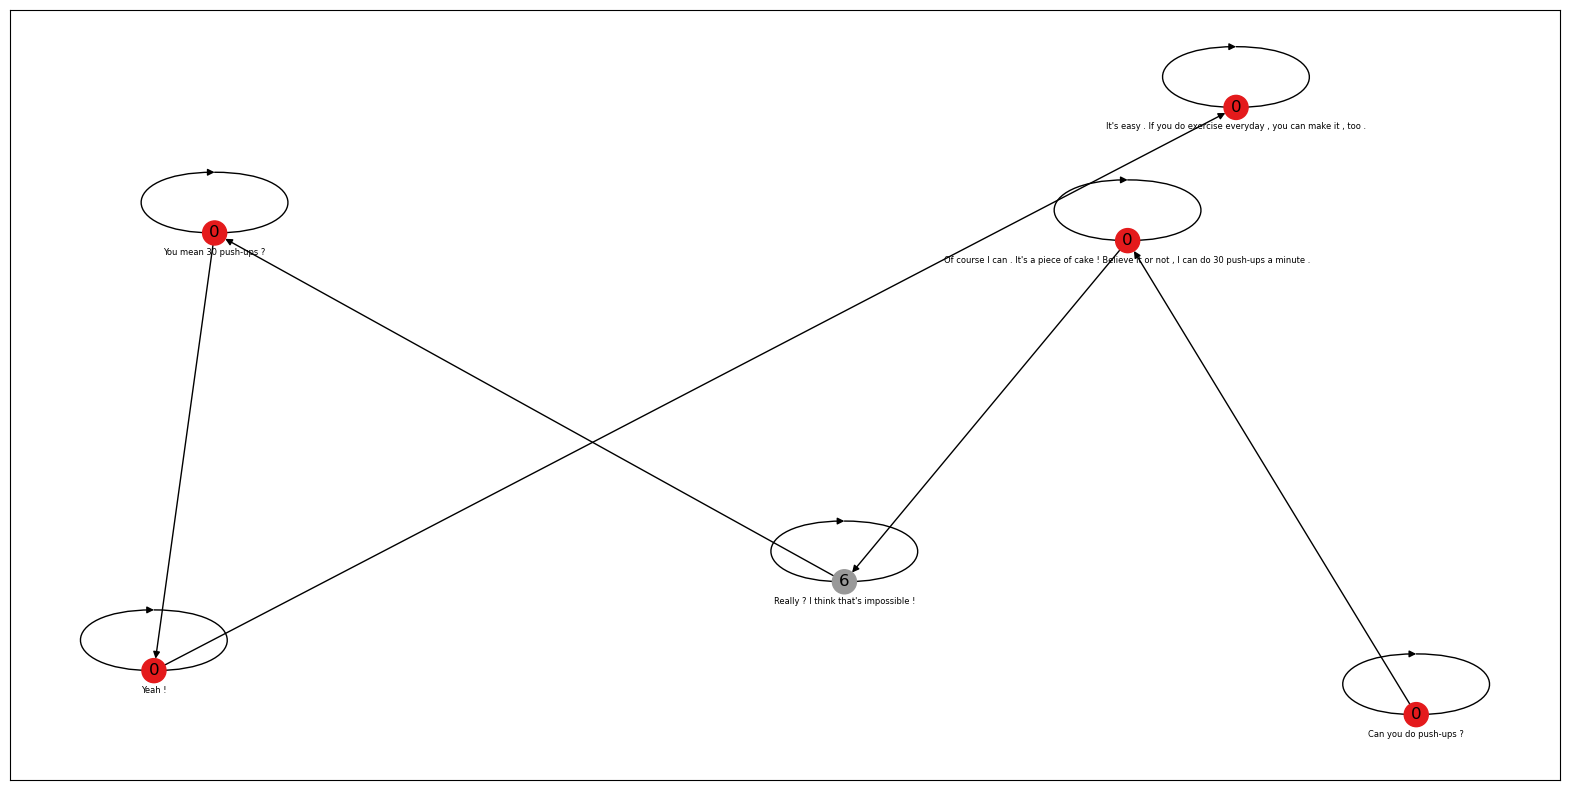

In [20]:
plot_graphs(G1, mapping_conv1, mapping_label1)

In [21]:
U = nx.disjoint_union(G, G1)
mapping_conv1.update(mapping_conv)
mapping_label1.update(mapping_label)

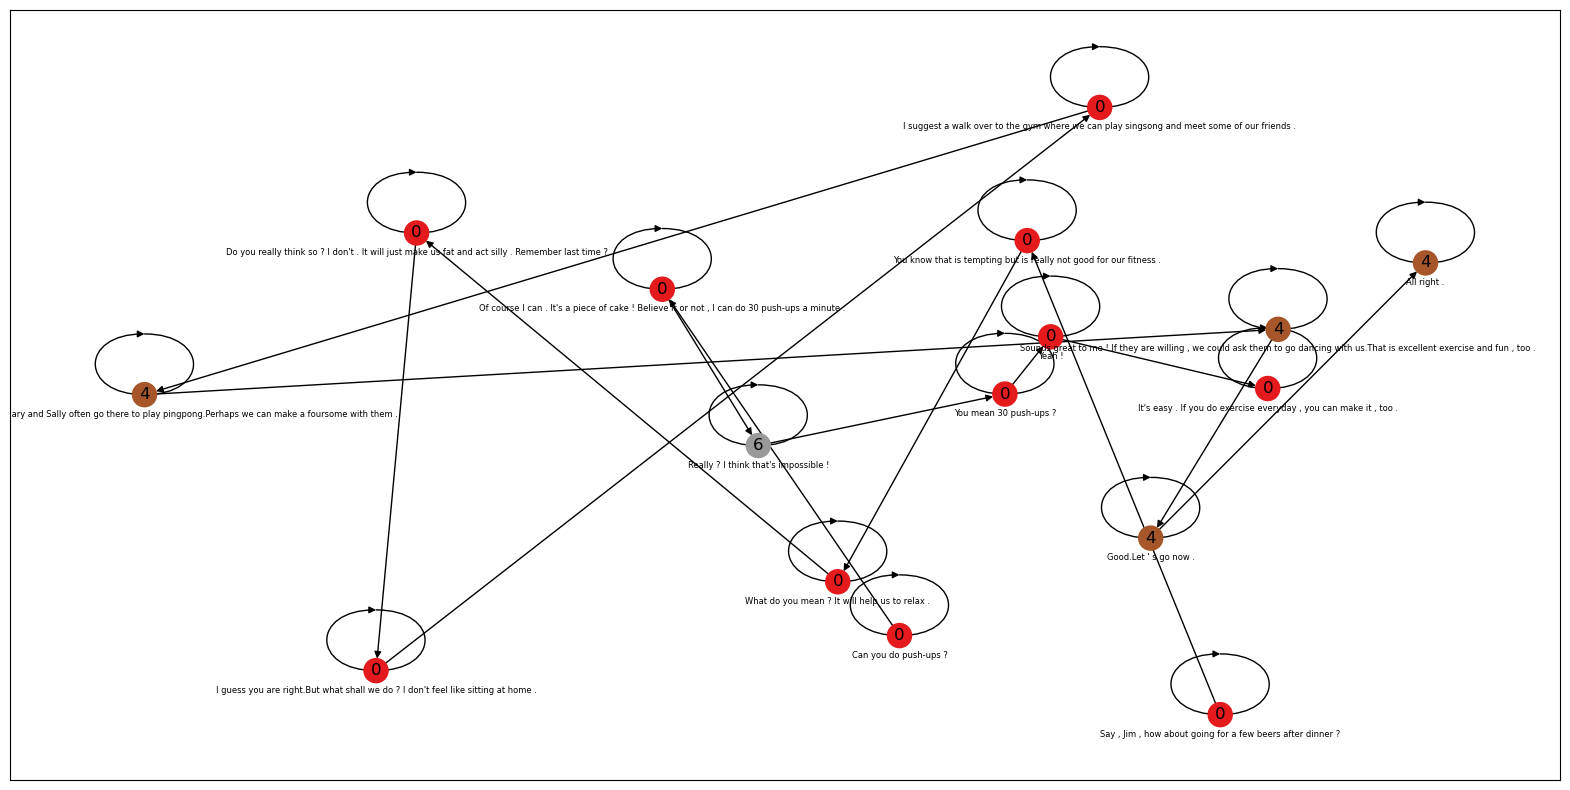

In [22]:
plot_graphs(U,mapping_conv1 , mapping_label1)

In [23]:
 data_raw["train"]["conversation"][0]

['Say , Jim , how about going for a few beers after dinner ?',
 'You know that is tempting but is really not good for our fitness .',
 'What do you mean ? It will help us to relax .',
 "Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?",
 "I guess you are right.But what shall we do ? I don't feel like sitting at home .",
 'I suggest a walk over to the gym where we can play singsong and meet some of our friends .',
 "That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them .",
 'Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too .',
 "Good.Let ' s go now .",
 'All right .']

## CREATE MULTIPLE GRAPH FROM MULTIPLE GRAPH

## Train graph

In [181]:
ikey = "train"
idata = data_raw["train"]
lenconv = 0
window_past = 1
window_future = 1
map_conv_all = {}
map_label_all = {}
ll_G = []
G1 = nx.DiGraph()
for ii, data in enumerate(idata["conversation"]):
    print(ii)
    conv = data
    emo  = idata["emotions"][ii]
    node_id = [lenconv + i for i in range(len(conv))]
    mapping_conv = dict(zip(node_id, conv))
    mapping_label = dict(zip(node_id, emo))
    perms = create_perms(node_id, window_past, window_future)
    G = nx.DiGraph()
    G.add_nodes_from(node_id)
    G.add_edges_from(perms)
    ll_G.append(G)
    G1 = nx.disjoint_union(G, G1)
    lenconv = lenconv+ len(data)
    map_conv_all.update(mapping_conv)
    map_label_all.update(mapping_label)
nx.write_gpickle(G1,'DD_train.gpickle')
pickle.dump({'G':G1, 'map_conv':map_conv_all, 'map_label':map_label_all}, open('DD_train_.pickle', 'wb'))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [216]:
!ls data | grep raw

Daily_Dailog_raw.pkl
Daily_topic_raw.pkl
Diaglog_raw.pkl
IEMOCAP_raw.pkl
MELD_raw.pkl


In [4]:
import pandas as pd
rs = pd.read_pickle("data/Daily_topic_raw.pkl")
rs.keys()

dict_keys(['conversation', 'emotions', 'actions', 'topics'])

In [223]:
for iraw in ["Daily_Dailog", "IEMOCAP", "MELD"]:
    data_raw = pd.read_pickle("data/{}_raw.pkl".format(iraw))
    edge_type_to_idx = {}
    if iraw == "MELD":
        n_speakers = 9
    else:
        n_speakers = 2
    for j in range(n_speakers):
        for k in range(n_speakers):
            edge_type_to_idx[str(j) + str(k) + '0'] = len(edge_type_to_idx)
            edge_type_to_idx[str(j) + str(k) + '1'] = len(edge_type_to_idx)
    for ikey in ["train", "test", "dev"]:
        print(iraw, ikey)
        idata = data_raw[ikey]
        lenconv = 0
        window_past = 1
        window_future = 1
        map_conv_all = {}
        map_label_all = {}
        map_edge_type_all = []
        ll_G = []
        G1 = nx.DiGraph()
        speaker = [i for sublist in idata["speakers"] for i in sublist]
        for ii, data in enumerate(idata["conversation"]):
            if ii % 100 == 0:
                print(ii)
            conv = data
            emo  = idata["emotions"][ii]
            node_id = [lenconv + i for i in range(len(conv))]
            mapping_conv = dict(zip(node_id, conv))
            mapping_label = dict(zip(node_id, emo))
            perms = create_perms(node_id, window_past, window_future)
            edge_type = []
            for item in perms:
                if item[0] < item[1]:
                    c = '0'
                else:
                    c = '1'
                eid = "{}{}{}".format(speaker[item[0]], speaker[item[1]],c)
                edge_type.append(edge_type_to_idx[eid])        
            G = nx.DiGraph()
            G.add_nodes_from(node_id)
            G.add_edges_from(perms)
            ll_G.append(G)
            G1 = nx.disjoint_union(G, G1)
            lenconv = lenconv+ len(data)
            map_conv_all.update(mapping_conv)
            map_label_all.update(mapping_label)
            map_edge_type_all.append(edge_type)
        nx.write_gpickle(G1,'{}_{}.gpickle'.format(iraw, ikey))
        pickle.dump({'G':G1, 'map_conv':map_conv_all, 'map_label':map_label_all, 'map_edge_type': map_edge_type_all}, open('{}_{}_.pickle'.format(iraw, ikey), 'wb'))

IEMOCAP train
0
100
IEMOCAP test
0
IEMOCAP dev
0
MELD train
0
100
200
300
400
500
600
700
800
900
1000
MELD test
0
100
200
MELD dev
0
100


# check graph distance

In [40]:
from WL_kernel import WL_General, WLsp_kernel, WL_Edge
import pandas as pd
import os
import networkx as nx

In [41]:
import torch
graph_path = "/home/n/nguyenpk/CS6220/project/NLP_DS_distance/data/GRAPH/{}_{}_.pickle"
emb_path = "/home/n/nguyenpk/CS6220/project/NLP_DS_distance/data/BERT_embed/{}_bert_embd.pickle"
prepare_graph = {}

for idtype in ["MELD", "IEMOCAP", "Daily_Dailog"]:
    print(idtype)
    map_label_all = {}
    nlen = 0
    G_total = nx.DiGraph()
    for itype in ["train", "test", "dev"]:
        print(itype)
        ikey = "{}_{}".format(idtype, itype)
        idata = pd.read_pickle(graph_path.format(idtype, itype))
        graph = idata["G"]
        label = idata["map_label"]
        new_label = { i+nlen:label[i] for i in label.keys()}
        map_label_all.update(new_label)
        nlen =  nlen + len(label.keys())
        prepare_graph[ikey] = (graph, label)
        G_total = nx.disjoint_union(G_total, idata['G'])

    prepare_graph["{}_all".format(idtype)] = (G_total, map_label_all)

MELD
train
test
dev
IEMOCAP
train
test
dev
Daily_Dailog
train
test
dev


In [42]:
Graphs = {}
ikey_list = list(prepare_graph.keys())
for i in range(len(prepare_graph)):
    Graphs[i] = {}
    Graphs[i]["Graph"] = prepare_graph[ikey_list[i]][0]
    Graphs[i]["labels"] = prepare_graph[ikey_list[i]][1]

In [43]:
K_  = WL_General(Graphs, 3, use_label=1)

In [44]:
pd.DataFrame(K_[-1])

,0,1,2,3,4,5,6,7,8,9,10,11
0,32072156.0,8490873.0,3268544.0,43831573.0,5990265.0,2078220.0,811893.0,8880378.0,4.515118e+08,39530884.0,4.385676e+07,5.349033e+08
1,8490873.0,2271236.0,868394.0,11630503.0,1622858.0,555802.0,211899.0,2390559.0,1.222323e+08,10698075.0,1.192170e+07,1.448528e+08
2,3268544.0,868394.0,342358.0,4479296.0,697677.0,233653.0,89248.0,1020578.0,4.385870e+07,3843931.0,4.257606e+06,5.196095e+07
3,43831573.0,11630503.0,4479296.0,59941372.0,8310800.0,2867675.0,1113040.0,12291515.0,6.176028e+08,54072890.0,6.003606e+07,7.317170e+08
4,5990265.0,1622858.0,697677.0,8310800.0,6360124.0,1975713.0,758661.0,9094498.0,5.438984e+07,4851386.0,5.034463e+06,6.427895e+07
5,2078220.0,555802.0,233653.0,2867675.0,1975713.0,667018.0,263095.0,2905826.0,1.905927e+07,1696224.0,1.703868e+06,2.246204e+07
6,811893.0,211899.0,89248.0,1113040.0,758661.0,263095.0,113974.0,1135730.0,6.329888e+06,567941.0,5.241450e+05,7.423320e+06
7,8880378.0,2390559.0,1020578.0,12291515.0,9094498.0,2905826.0,1135730.0,13136054.0,7.977899e+07,7115551.0,7.262476e+06,9.416431e+07
8,451511837.0,122232293.0,43858699.0,617602829.0,54389840.0,19059266.0,6329888.0,79778994.0,8.871765e+09,769814706.0,8.852076e+08,1.052720e+10
9,39530884.0,10698075.0,3843931.0,54072890.0,4851386.0,1696224.0,567941.0,7115551.0,7.698147e+08,66836554.0,7.676070e+07,9.134401e+08


In [45]:
distance = np.zeros_like(K_[-1])
K = K_[-1]
for i in range(distance.shape[0]):
    for j in range(distance.shape[1]):
        distance[i, j] = np.sqrt(K[i,i] + K[j,j] - 2*K[i,j])

In [46]:
pdf = pd.DataFrame(distance, columns=prepare_graph.keys(), index=prepare_graph.keys())

In [49]:
arr_columns = ['IEMOCAP_train', 'IEMOCAP_test', 'IEMOCAP_dev', 'IEMOCAP_all', 'Daily_Dailog_train', 'Daily_Dailog_test', 'Daily_Dailog_dev', 'Daily_Dailog_all', 'MELD_train', 'MELD_test', 'MELD_dev', 'MELD_all']
pd.to_pickle(pdf.loc[arr_columns, arr_columns], "data/result/WL_distance.pkl")

In [48]:
# pd.to_pickle(rs_topic, "data/embedd_GAE_DD_TOPIC.pkl")

## DD_TOPICS

In [6]:
from preprocessing import preprocessing_raw as pr
from preprocessing import preprocessing_token as pt
#
import sys
from sysconf import  conf
import pandas as pd, numpy as np, pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset
# HOT FIX CODE

daily_tool = pr.Daily_Dialog_preprocessing()
conv_path = os.path.join(conf["raw_Daily_Dailog_path"], "dialogues_text.txt")
emo_path = os.path.join(conf["raw_Daily_Dailog_path"], "dialogues_emotion.txt")
act_path = os.path.join(conf["raw_Daily_Dailog_path"], "dialogues_act.txt")
topic_path = os.path.join(conf["raw_Daily_Dailog_path"], "dialogues_topic.txt")
data_raw_DD_topic = daily_tool.reading_DD(conv_path, emo_path, act_path, topic_path)

ll_d = []
ll_l = []
ll_t = []
ll_a = []
ll_s = []
for i in  range(len(data_raw_DD_topic['conversation'])):
    data = data_raw_DD_topic['conversation'][i]
    label = data_raw_DD_topic['emotions'][i]
    topic = data_raw_DD_topic['topics'][i]
    action = data_raw_DD_topic['actions'][i]
    speaker = data_raw_DD_topic["speakers"][i]
    if len(data) != len(label): ## cancel this data
        print(i)
        continue
    ll_d.append(data)
    ll_l.append(label)
    ll_t.append(topic)
    ll_a.append(action)
    ll_s.append(speaker)
data_raw_DD_topic = {'conversation': ll_d, 'emotions': ll_l, "actions":ll_a, "topics":ll_t, "speakers":ll_s}
pd.to_pickle(data_raw_DD_topic, "data/Daily_topic_raw_fix_topic.pkl")

import pandas as pd
data_path="/home/n/nguyenpk/CS6220/project/NLP_DS_distance/data/Daily_topic_raw.pkl"
data_topic_path = "/home/n/nguyenpk/CS6220/project/NLP_DS_distance/SLURM_SCRIPT/DD_graph/Daily_topic_{}_.pickle"
DATA = pd.read_pickle(data_path)
pd.to_pickle(ll_t, "refix_topic_672.pickle")

672


In [30]:
rs = {} # [nx.DiGraph(),nx.DiGraph(),nx.DiGraph(),nx.DiGraph()]
topic = pd.read_pickle("refix_topic_672.pickle")
bert_fts = pd.read_pickle("data/Daily_topic_BERT.pkl") ## fts vector epochs 50
#------------------------------------------------------------------
for itopic in np.unique(topic):
    Graph = nx.DiGraph()
    map_label = {}
    X = []
    for idex, j in enumerate(topic):
        if j == itopic:
            Data = pd.read_pickle(data_topic_path.format(idex))
            Graph = nx.disjoint_union(Graph, Data['G'])
            X.append(bert_fts["embedd_CLS"][idex])
            map_label.update(Data['map_edge_type']) 
    rs[itopic] = {'Graph': Graph, "labels": map_label, "fts": X}


In [31]:
pd.to_pickle(rs, "data/Graph_DD_topic.pkl")

In [39]:
rs = pd.read_pickle("data/Graph_DD_topic.pkl")

In [32]:
Graphs_topics = {}
for i in range(len(rs)):
    Graphs_topics[i] = rs[i+1]

In [33]:
K_  = WL_General(Graphs_topics, 3, use_label=1)

In [34]:
pd.DataFrame(K_[-1])

,0,1,2,3,4,5,6,7,8,9
0,1.050848e+09,217417767.0,26748824.0,194020529.0,1.490042e+09,394772336.0,123594334.0,6.668033e+08,74212074.0,200027612.0
1,2.174178e+08,49209816.0,6077914.0,42696148.0,3.315057e+08,88135474.0,28008638.0,1.482443e+08,17010666.0,44956810.0
2,2.674882e+07,6077914.0,751198.0,5249029.0,4.082960e+07,10863400.0,3460300.0,1.825530e+07,2105059.0,5547770.0
3,1.940205e+08,42696148.0,5249029.0,38311980.0,2.936460e+08,77774537.0,24265589.0,1.315355e+08,14531694.0,39352181.0
4,1.490042e+09,331505740.0,40829603.0,293646027.0,2.261930e+09,600067249.0,188520989.0,1.012691e+09,113500557.0,304556727.0
5,3.947723e+08,88135474.0,10863400.0,77774537.0,6.000672e+08,159434402.0,50147006.0,2.687320e+08,30206451.0,81008120.0
6,1.235943e+08,28008638.0,3460300.0,24265589.0,1.885210e+08,50147006.0,15944842.0,8.430776e+07,9685771.0,25591488.0
7,6.668033e+08,148244340.0,18255296.0,131535507.0,1.012691e+09,268732034.0,84307762.0,4.536641e+08,50696747.0,136331024.0
8,7.421207e+07,17010666.0,2105059.0,14531694.0,1.135006e+08,30206451.0,9685771.0,5.069675e+07,5924204.0,15462403.0
9,2.000276e+08,44956810.0,5547770.0,39352181.0,3.045567e+08,81008120.0,25591488.0,1.363310e+08,15462403.0,41250966.0


In [35]:
distance = np.zeros_like(K_[-1])
K = K_[-1]
for i in range(distance.shape[0]):
    for j in range(distance.shape[1]):
        distance[i, j] = np.sqrt(K[i,i] + K[j,j] - 2*K[i,j])

In [36]:
pd.DataFrame(distance)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,25791.908460,31592.749326,26478.655215,18239.881414,20511.898742,28628.734411,13073.088617,30138.817429,26306.729215
1,25791.908460,0.000000,6148.592197,1459.280645,40597.141476,5689.751313,3022.810282,14366.112975,4594.854513,739.703995
2,31592.749326,6148.592197,0.000000,5344.634693,46701.408458,11766.851745,3126.570006,20442.716845,1570.122288,5559.372626
3,26478.655215,1459.280645,5344.634693,0.000000,41387.793925,6495.945505,2392.831795,15129.607794,3895.227336,926.598079
4,18239.881414,40597.141476,46701.408458,41387.793925,0.000000,34946.093687,43598.536948,26271.867311,45175.797171,41159.046053
5,20511.898742,5689.751313,11766.851745,6495.945505,34946.093687,0.000000,8665.173512,8696.804011,10244.301050,6218.450611
6,28628.734411,3022.810282,3126.570006,2392.831795,43598.536948,8665.173512,0.000000,17349.160902,1580.349328,2452.107665
7,13073.088617,14366.112975,20442.716845,15129.607794,26271.867311,8696.804011,17349.160902,0.000000,18926.034344,14908.151596
8,30138.817429,4594.854513,1570.122288,3895.227336,45175.797171,10244.301050,1580.349328,18926.034344,0.000000,4031.174023
9,26306.729215,739.703995,5559.372626,926.598079,41159.046053,6218.450611,2452.107665,14908.151596,4031.174023,0.000000


#### TOPIC

In [88]:
Graph_topic_2 = {}
ii = 0
for i in range(13117):
    Data = pd.read_pickle(data_topic_path.format(i))
    label = Data['map_edge_type']
    if len(label) >= 12:
        if ii % 100 == 0:
            print(ii)
        Graph_topic_2[ii] = {}
        itopic = Data['topic']
        if itopic == 4:
            continue
        Graph_topic_2[ii]["Graph"] = Data['G']
        Graph_topic_2[ii]["labels"] = Data['map_edge_type']
        Graph_topic_2[ii]["topic"] = itopic
        ii = ii + 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [ ]:
pd.to_pickle({'Graph':Graph_topic, 'label':map_label}, "data/Graph_DD_topic.pkl")

In [ ]:
K_  = WL_General(Graphs_topics, 3, use_label=1)